In [1]:
import numpy as np
import csv
import pandas as pd
import seaborn as  sns 

In [2]:
df_learning = pd.DataFrame(pd.read_csv('/home/iefode/Documents/test/out_learning.csv'))
df_learning = df_learning.drop_duplicates()

df_learning

,name,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Olga,Russia,13,54,4,173.194.222.196,172.20.10.8,wide-plus.l.google.com,172.20.10.8,443,55910
1,Olga,Russia,14,14,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
2,Olga,Russia,11,18,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
3,Olga,Russia,14,13,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
4,Olga,Russia,15,46,0,23.111.102.40,172.20.10.8,p-rumo00.kxcdn.com,172.20.10.8,443,59921
5,Olga,Russia,15,56,0,91.189.88.24,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,60048
6,Olga,Russia,11,25,2,8.247.253.254,172.20.10.8,auto.au.download.windowsupdate.com.c.footprint...,172.20.10.8,80,60434
7,Olga,Russia,15,55,0,91.189.88.24,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,60048
9,Olga,Russia,14,13,2,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,172.20.10.8,443,64019
10,Olga,Russia,13,54,2,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,172.20.10.8,443,64019


In [3]:
df_validation = pd.DataFrame(pd.read_csv('/home/iefode/Documents/test/out_validation.csv'))
df_validation = df_validation.drop_duplicates()
df_validation

,name,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Olga,Russia,10,23,1,185.40.154.13,192.168.3.40,user20442.clients-cdnnow.ru,192.168.3.40,443,51112
1,Olga,Russia,11,19,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
2,Olga,Russia,10,17,1,195.2.67.180,192.168.3.40,srcipt.ru,192.168.3.40,80,50756
3,Olga,Russia,7,27,2,172.20.10.8,178.154.131.217,172.20.10.8,yastatic.net,52440,443
4,Olga,Russia,11,17,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
5,Olga,Russia,7,27,2,136.243.37.177,172.20.10.8,cdn.lifehacker.ru,172.20.10.8,443,52377
6,Olga,Russia,15,47,0,91.189.88.174,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,59939
7,Olga,Russia,14,11,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
8,Olga,Russia,23,7,2,77.88.21.179,172.20.10.8,adfox-external-l3-engine.stable.qloud-b.yandex...,172.20.10.8,443,65451
9,Olga,Russia,13,55,2,104.78.36.179,172.20.10.8,e19210.b.akamaiedge.net,172.20.10.8,443,64088


In [4]:
df = pd.concat([df_validation, df_learning])
df = df.drop_duplicates()
df.shape

(28036, 11)

In [5]:
df_tmp = df
names = df['name']
df = df.drop(axis=1, labels='name')
df

,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Russia,10,23,1,185.40.154.13,192.168.3.40,user20442.clients-cdnnow.ru,192.168.3.40,443,51112
1,Russia,11,19,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
2,Russia,10,17,1,195.2.67.180,192.168.3.40,srcipt.ru,192.168.3.40,80,50756
3,Russia,7,27,2,172.20.10.8,178.154.131.217,172.20.10.8,yastatic.net,52440,443
4,Russia,11,17,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
5,Russia,7,27,2,136.243.37.177,172.20.10.8,cdn.lifehacker.ru,172.20.10.8,443,52377
6,Russia,15,47,0,91.189.88.174,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,59939
7,Russia,14,11,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
8,Russia,23,7,2,77.88.21.179,172.20.10.8,adfox-external-l3-engine.stable.qloud-b.yandex...,172.20.10.8,443,65451
9,Russia,13,55,2,104.78.36.179,172.20.10.8,e19210.b.akamaiedge.net,172.20.10.8,443,64088


In [69]:
# names_validation = df_validation['name']
# df_validation = df_validation.drop(axis=1, labels='name')
# df_validation

,country,hours,minutes,weekday,ip.src,ip.dst,ip.src_host,ip.dst_host,tcp.srcport,tcp.dstport
0,Russia,10,23,1,185.40.154.13,192.168.3.40,user20442.clients-cdnnow.ru,192.168.3.40,443,51112
1,Russia,11,19,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
2,Russia,10,17,1,195.2.67.180,192.168.3.40,srcipt.ru,192.168.3.40,80,50756
3,Russia,7,27,2,172.20.10.8,178.154.131.217,172.20.10.8,yastatic.net,52440,443
4,Russia,11,17,2,172.20.10.8,151.101.85.63,172.20.10.8,dualstack.r.ssl.global.fastly.net,60860,443
5,Russia,7,27,2,136.243.37.177,172.20.10.8,cdn.lifehacker.ru,172.20.10.8,443,52377
6,Russia,15,47,0,91.189.88.174,172.20.10.8,archive.ubuntu.com,172.20.10.8,80,59939
7,Russia,14,11,2,172.20.10.8,217.69.142.96,172.20.10.8,cld-upload10.q.smailru.net,64019,443
8,Russia,23,7,2,77.88.21.179,172.20.10.8,adfox-external-l3-engine.stable.qloud-b.yandex...,172.20.10.8,443,65451
9,Russia,13,55,2,104.78.36.179,172.20.10.8,e19210.b.akamaiedge.net,172.20.10.8,443,64088


In [6]:
column_description = [
    "country",
    "hours",
    "minutes",
    "weekday",
    "ip.src",
    "ip.dst",
    "ip.src_host",
    "ip.dst_host",
    "tcp.srcport",
    "tcp.dstport"
]


# labels = np.array(column_description)

In [7]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


# convert the labels from strings to numbers (0,1,2....)
y = LabelEncoder().fit_transform(names)
# y_validation = LabelEncoder().fit_transform(names_validation)

def feature_extract(frame):
    for f in frame.columns:
        if frame[f].dtype == 'object':
            lbl_enc = LabelEncoder()
            # same as above encoding. it takes every object dtype from 
            # pandas dataframe and converts to numerical labels
            frame[f] = lbl_enc.fit_transform(frame[f].values)

x = df

feature_extract(x)

x = x.values

# binarize the encoded columns. this is not needed if you are using a tree based algorithm
ohe = OneHotEncoder(categories='auto')
x = ohe.fit_transform(x)

# use the following for SVMs (with_mean=False for sparse data)
scl = StandardScaler(with_mean=False)
x = scl.fit_transform(x)

In [8]:
x.shape

(28036, 15535)

In [9]:
y.shape

(28036,)

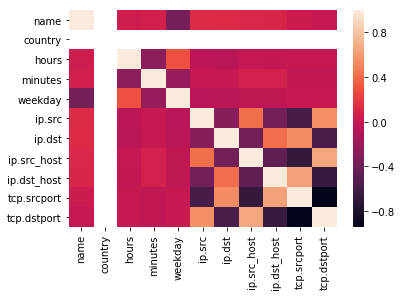

In [10]:
feature_extract(df_tmp)
cl = df_tmp.corr()
sns.heatmap(cl, 
            xticklabels=cl.columns.values,
            yticklabels=cl.columns.values)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc, roc_curve, roc_auc_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [13]:
from sklearn.svm import SVC
clf = SVC(decision_function_shape='ovo', gamma=0.001, C=100.)
clf.fit(x_train, y_train)
print("Accuracy: {}".format(clf.score(x_test, y_test)))
report = classification_report(y_test, clf.predict(x_test), target_names=["Olga", "iefode", "roman", "George"])
print(report)
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=clf.predict(x_test), 
    y_score=clf.predict_proba(x_test))
print(report_with_auc)

Accuracy: 0.843419331827
              precision    recall  f1-score   support

        Olga       0.81      0.99      0.89      5190
      iefode       0.98      0.63      0.77      1734
       roman       1.00      0.29      0.46       139
      George       0.94      0.62      0.75      1348

   micro avg       0.84      0.84      0.84      8411
   macro avg       0.93      0.63      0.71      8411
weighted avg       0.87      0.84      0.83      8411



AttributeError: predict_proba is not available when  probability=False

In [14]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(random_state=0)
m1.fit(x_train, y_train)
print("Accuracy: {}".format(m1.score(x_test, y_test)))
report = classification_report(y_test, m1.predict(x_test), target_names=["Olga", "iefode", "roman", "George"])
print(report)

report_with_auc = class_report(
    y_true=y_test, 
    y_pred=m1.predict(x_test), 
    y_score=m1.predict_proba(x_test))
print(report_with_auc)


Accuracy: 1.0
              precision    recall  f1-score   support

        Olga       1.00      1.00      1.00      5190
      iefode       1.00      1.00      1.00      1734
       roman       1.00      1.00      1.00       139
      George       1.00      1.00      1.00      1348

   micro avg       1.00      1.00      1.00      8411
   macro avg       1.00      1.00      1.00      8411
weighted avg       1.00      1.00      1.00      8411

             precision  recall  f1-score  support    pred  AUC
0                  1.0     1.0       1.0   5190.0  5190.0  1.0
1                  1.0     1.0       1.0   1734.0  1734.0  1.0
2                  1.0     1.0       1.0    139.0   139.0  1.0
3                  1.0     1.0       1.0   1348.0  1348.0  1.0
avg / total        1.0     1.0       1.0   8411.0  8411.0  1.0


/home/iefode/ml/local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/iefode/ml/local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=0)
model.fit(x_train, y_train)
print("Accuracy: {}".format(model.score(x_test, y_test)))
report = classification_report(y_test, model.predict(x_test), target_names=["Olga",  "George", "iefode", "roman"])
print(report)
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=model.predict(x_test), 
    y_score=model.predict_proba(x_test))
print(report_with_auc)

Accuracy: 0.999881108073
              precision    recall  f1-score   support

        Olga       1.00      1.00      1.00      5190
      George       1.00      1.00      1.00      1734
      iefode       1.00      1.00      1.00       139
       roman       1.00      1.00      1.00      1348

   micro avg       1.00      1.00      1.00      8411
   macro avg       1.00      1.00      1.00      8411
weighted avg       1.00      1.00      1.00      8411



/home/iefode/ml/local/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [26]:
from sklearn.ensemble import RandomForestClassifier
m2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)
m2.fit(x_train, y_train)
print(m2.score(x_test, y_test))
report = classification_report(y_test, m2.predict(x_test), target_names=["Olga", "iefode", "roman", "George"])
print(report)
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=m2.predict(x_test), 
    y_score=m2.predict_proba(x_test))
print(report_with_auc)


0.6710260373320651
              precision    recall  f1-score   support

        Olga       0.65      1.00      0.79      5190
      iefode       1.00      0.15      0.25      1734
       roman       0.00      0.00      0.00       139
      George       1.00      0.15      0.26      1348

   micro avg       0.67      0.67      0.67      8411
   macro avg       0.66      0.32      0.33      8411
weighted avg       0.77      0.67      0.58      8411

             precision    recall  f1-score  support    pred       AUC
0             0.652256  1.000000  0.789534   5190.0  7957.0  1.000000
1             1.000000  0.145905  0.254655   1734.0   253.0  1.000000
3             1.000000  0.149110  0.259522   1348.0   201.0  0.327112
avg / total   0.768899  0.671026  0.581273   8272.0  8272.0  0.955749


In [18]:
from sklearn.naive_bayes import MultinomialNB
m3 = MultinomialNB()
m3.fit(x_train, y_train)
print("Accuracy: {}".format(m3.score(x_test, y_test)))
report = classification_report(y_test, m3.predict(x_test), target_names=["Olga", "iefode", "roman", "George"])
print(report)
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=m3.predict(x_test), 
    y_score=m3.predict_proba(x_test))
print(report_with_auc)

Accuracy: 0.795386993223
              precision    recall  f1-score   support

        Olga       0.99      0.76      0.86      5190
      iefode       0.96      0.80      0.87      1734
       roman       0.09      1.00      0.16       139
      George       0.88      0.91      0.89      1348

   micro avg       0.80      0.80      0.80      8411
   macro avg       0.73      0.87      0.70      8411
weighted avg       0.95      0.80      0.85      8411

             precision    recall  f1-score  support    pred       AUC
0             0.986463  0.758189  0.857392   5190.0  3989.0  0.966263
1             0.955449  0.803922  0.873160   1734.0  1459.0  0.984968
2             0.088254  1.000000  0.162194    139.0  1575.0  0.920394
3             0.880403  0.906528  0.893275   1348.0  1388.0  0.972900
avg / total   0.948227  0.795387  0.854905   8411.0  8411.0  0.934785


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
m4 = LinearDiscriminantAnalysis()
m4.fit(x_train.toarray(), y_train)
m4.score(x_test.toarray(), y_test)
# report_with_auc = class_report(
#     y_true=y_test, 
#     y_pred=m4.predict(x_test), 
#     y_score=m4.predict_proba(x_test))
# print(report_with_auc)

KeyboardInterrupt: 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train, y_train)
print("Accuracy: {}".format(neigh.score(x_test, y_test)))
report = classification_report(y_test, neigh.predict(x_test), target_names=["Olga", "iefode", "roman", "George"])
print(report)
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=neigh.predict(x_test), 
    y_score=neigh.predict_proba(x_test))
print(report_with_auc)

Accuracy: 0.783497800499
              precision    recall  f1-score   support

        Olga       0.95      0.77      0.85      5190
      iefode       0.93      0.77      0.84      1734
       roman       1.00      0.45      0.62       139
      George       0.44      0.88      0.59      1348

   micro avg       0.78      0.78      0.78      8411
   macro avg       0.83      0.72      0.72      8411
weighted avg       0.87      0.78      0.80      8411

             precision    recall  f1-score  support    pred       AUC
0             0.949514  0.771869  0.851525   5190.0  4219.0  0.852870
1             0.932120  0.768166  0.842238   1734.0  1429.0  0.876819
2             1.000000  0.446043  0.616915    139.0    62.0  0.723022
3             0.440578  0.882789  0.587799   1348.0  2701.0  0.834429
avg / total   0.865197  0.783498  0.803467   8411.0  8411.0  0.855665


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
print("Accuracy: {}".format(clf.score(x_test, y_test)))
report = classification_report(y_test, clf.predict(x_test), target_names=["Olga", "iefode", "roman", "George"])
print(report)
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=clf.predict(x_test), 
    y_score=clf.predict_proba(x_test))
print(report_with_auc)
# cross_val_score(clf, x_train, x_test, cv=10)

Accuracy: 1.0
              precision    recall  f1-score   support

        Olga       1.00      1.00      1.00      5190
      iefode       1.00      1.00      1.00      1734
       roman       1.00      1.00      1.00       139
      George       1.00      1.00      1.00      1348

   micro avg       1.00      1.00      1.00      8411
   macro avg       1.00      1.00      1.00      8411
weighted avg       1.00      1.00      1.00      8411

             precision  recall  f1-score  support    pred  AUC
0                  1.0     1.0       1.0   5190.0  5190.0  1.0
1                  1.0     1.0       1.0   1734.0  1734.0  1.0
2                  1.0     1.0       1.0    139.0   139.0  1.0
3                  1.0     1.0       1.0   1348.0  1348.0  1.0
avg / total        1.0     1.0       1.0   8411.0  8411.0  1.0


NameError: name 'plt' is not defined

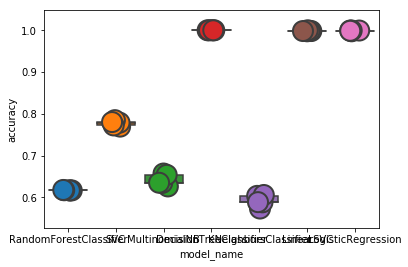

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    SVC(decision_function_shape='ovo', gamma=0.001, C=200.),
    MultinomialNB(),
#     LinearDiscriminantAnalysis(),
    DecisionTreeClassifier(random_state=0),
    KNeighborsClassifier(n_neighbors=1),
    LinearSVC(random_state=0),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    model.fit(x_train, y_train)
    accuracies = cross_val_score(model, x_test, y_test, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()